# Problem Statement
The Diabetes Pedigree Function (DPF) is a tool used to assess the genetic risk of diabetes mellitus based on family history. Introduced in 1993 as part of the Diabetes Genetics Initiative, it calculates a numerical score indicating the likelihood of an individual developing diabetes. This score increases with each affected first-degree relative (parents or siblings), with higher scores indicating greater genetic predisposition. The DPF helps stratify individuals into risk categories, although it's important to remember that genetics is just one aspect of diabetes risk, alongside lifestyle and environmental factors. 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
Let us first load the dataset in a  variable called 'diabetes' using pandas.

In [24]:
# Loading the diabetes pedigree function dataset
diabetes = pd.read_csv('diabetes.csv')
# Let us drop diabetes outcome such that we can predict diabetes rate accurately
diabetes = diabetes.drop('Outcome',axis = 1)

Now let us review the contents of the dataframe using `describe()` function and shape of the dataframe using `shape` function to understand the data and start cleaning it.

In [25]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [26]:
diabetes.shape

(768, 8)

From the above function we can see that there are 768 rows and 8 columns. Here our main focus is on the columns which are:
   - Pregnancies
   - Glucose
   - Blood Pressure
   - Skin Thickness
   - Insulin
   - BMI
   - Diabetes Pedigree Function(DPF)
   - Age

In the folloing we are going to predict Diabetes Pedigree Function(DPF) based on the other columns.

# Data Pre-processing
From studying the description of the dataframe we can conclude few things about the data of Prima Indians Diabetes dataset they are:
 - There are many zeros present in the dataset but zeroes in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` don't make any sense which means they are replacements of null data.
 - We will replace zero with null using `replace()` function.

In [27]:
# Loading columns to change to null instead of zero
zero_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes[zero_columns] = diabetes[zero_columns].replace(0, np.nan)

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


We can now see that the minimum values of `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` are not zeros any more which they are the real ones and null values have been created instead of zeroes to double check it we will use `info()` to check number of non-null values.

In [28]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


Since there is difference in non-null values we can say we were successful in representing null values. 

We will do the follwing :
 - Use simple Imputer to change null value.
 - Use median startegy because it is not sensitive to outliers.

Doing this will allow us to make the prediction a bit more accurate.

In [29]:
from sklearn.impute import SimpleImputer

# Simple imputer function with median strategy
imputer = SimpleImputer(strategy = 'median')

# Imputing the dataset
imputed_diabetes = pd.DataFrame(imputer.fit_transform(diabetes), columns=diabetes.columns)

imputed_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

After using simple imputer we can see that there are no null values in the dataset. Now let us divide the dataset into X and y where :
 - X = All columns except DiabetesPedigreeFunction
 - y = DiabetesPedigreeFunction

c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

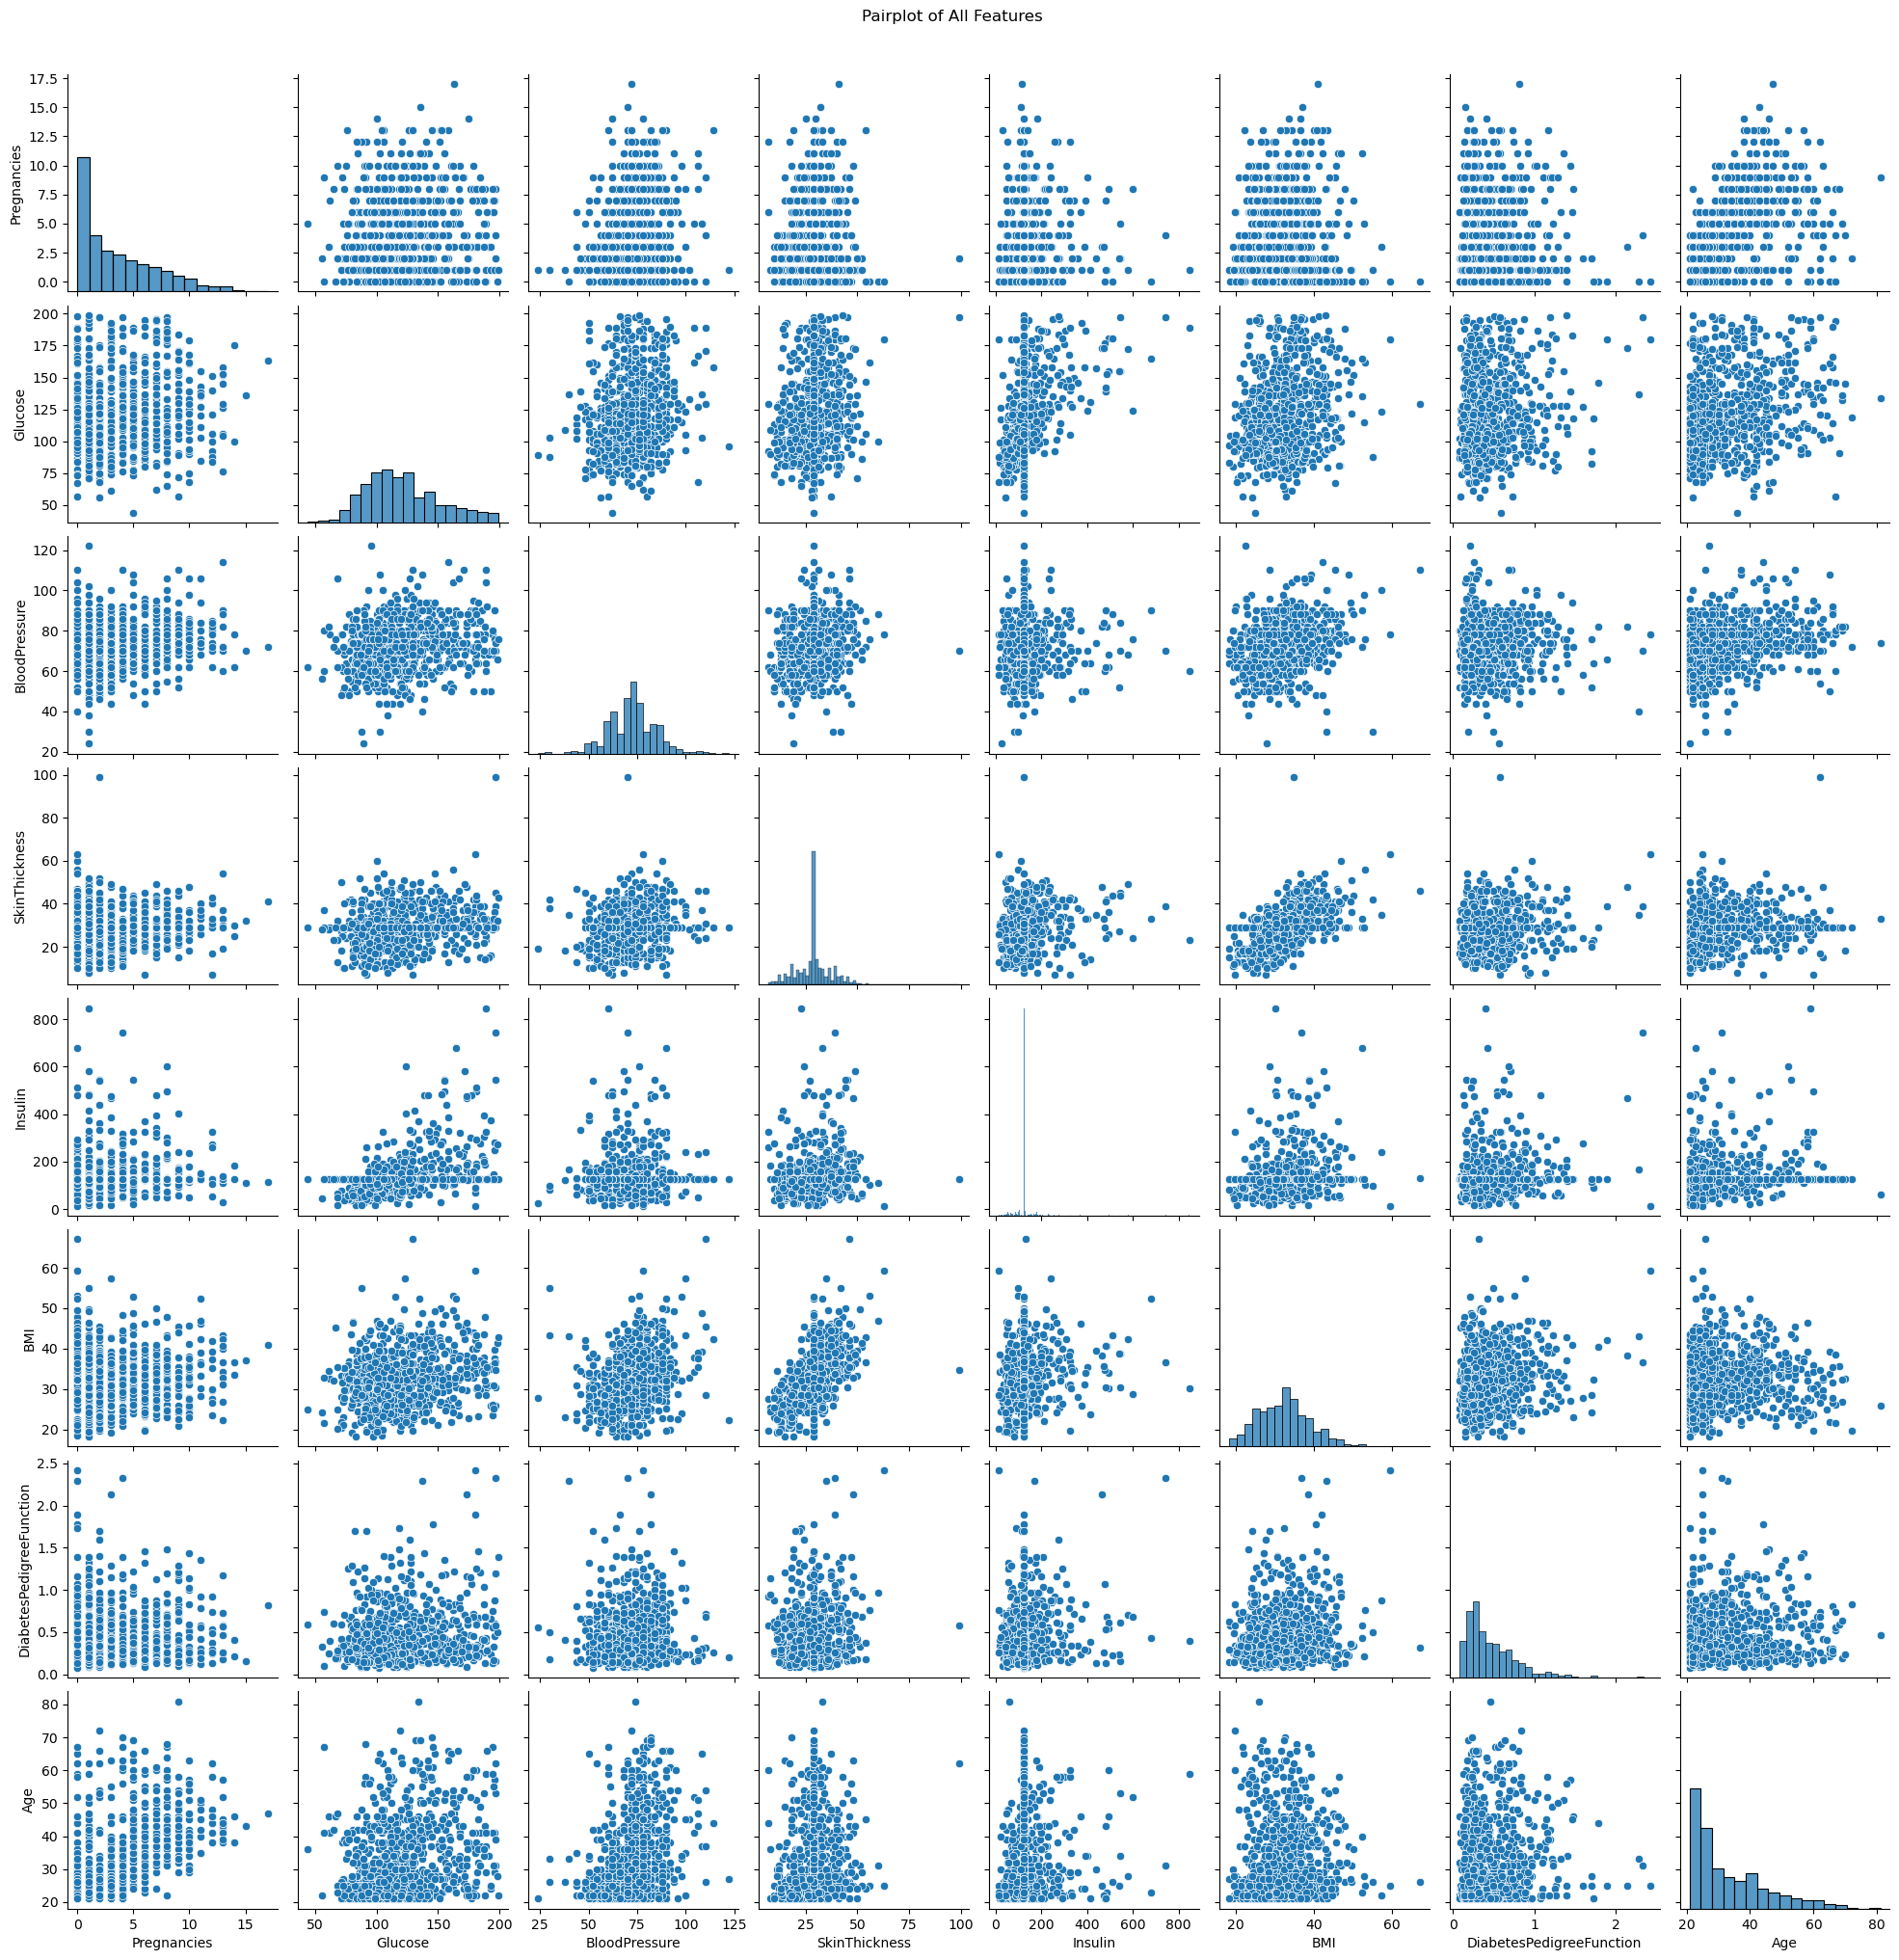

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(imputed_diabetes)

# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()

c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

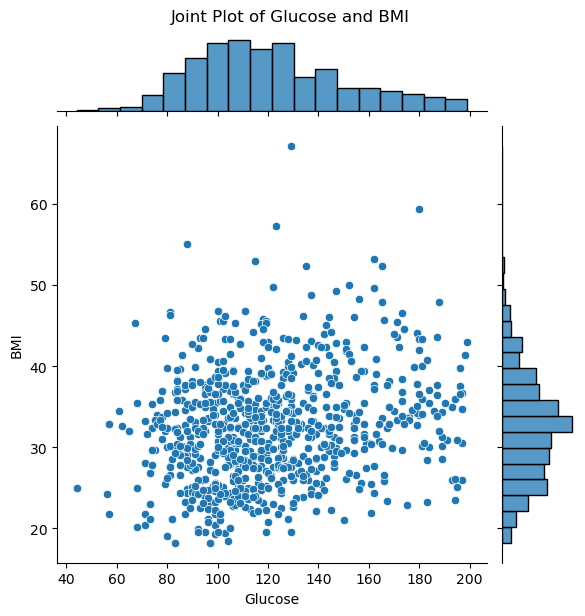

c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

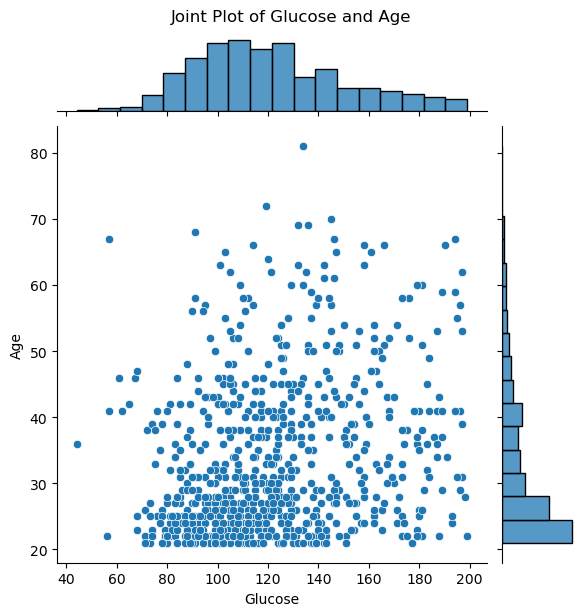

c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

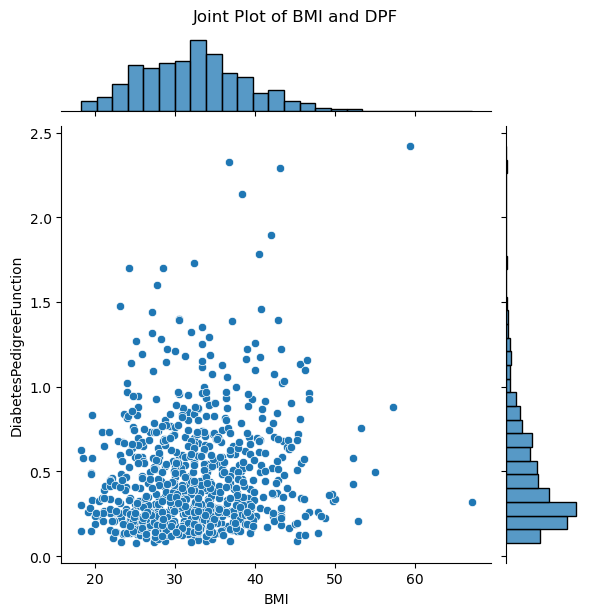

c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

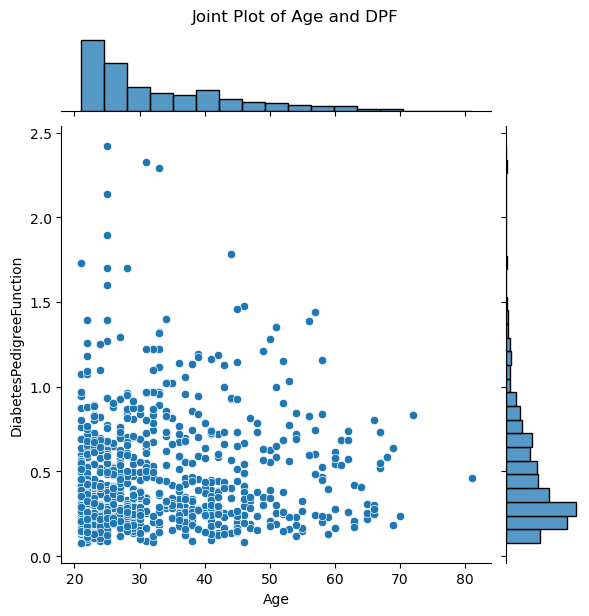

In [31]:
# Joint Plots for selected pairs
sns.jointplot(x='Glucose', y='BMI', data=df, kind='scatter')
plt.suptitle('Joint Plot of Glucose and BMI', y=1.02)
plt.show()

sns.jointplot(x='Glucose', y='Age', data=df, kind='scatter')
plt.suptitle('Joint Plot of Glucose and Age', y=1.02)
plt.show()

sns.jointplot(x='BMI', y='DiabetesPedigreeFunction', data=df, kind='scatter')
plt.suptitle('Joint Plot of BMI and DPF', y=1.02)
plt.show()

sns.jointplot(x='Age', y='DiabetesPedigreeFunction', data=df, kind='scatter')
plt.suptitle('Joint Plot of Age and DPF', y=1.02)
plt.show()

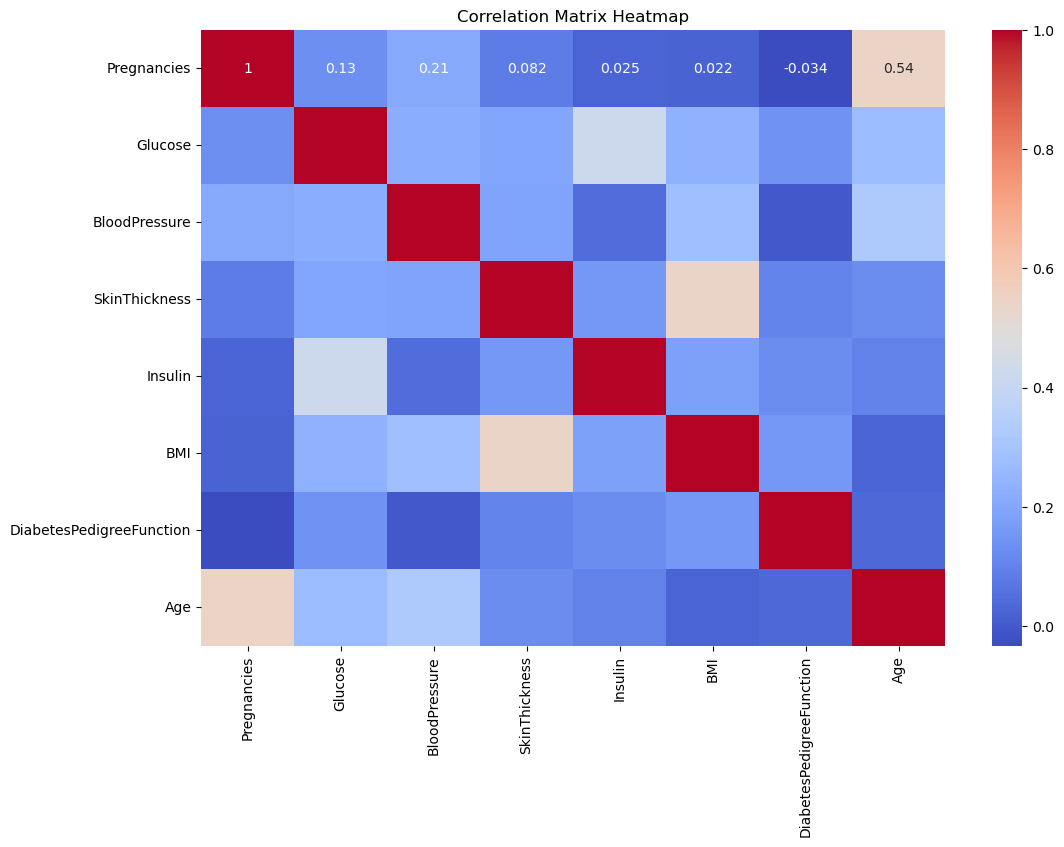

In [40]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
X = imputed_diabetes.drop('DiabetesPedigreeFunction',axis = 1)
y = imputed_diabetes.DiabetesPedigreeFunction

We will now Split X and y into **X_train**, **X_test** and **y_train**, **y_test** where train values are 70% and test being 30% of original.

In [34]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

# Fitting and Prediction

We will first use Random Forest to fit and predict values with 50 n_estimators and random_state as 1.

In [35]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor variable creation
rfr = RandomForestRegressor(n_estimators= 50, random_state=1)

# Fitting train data using RandomForestRegressor
rfr.fit(X_train,y_train)

c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestRegressor(n_estimators=50, random_state=1)

In [36]:
from sklearn.metrics import mean_absolute_error

# Predicting test data
y_pred = rfr.predict(X_test)

# Mean Absolute Error
mae_rfr = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for Random Forest Regression:", mae_rfr)


Mean Absolute Error for Random Forest Regression: 0.2568996536796537


c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

We will now use XG Boost to train and predict values with Learning rate of 0.009 and max leaves of 10.

In [37]:
from xgboost import XGBRegressor

# XG Boost variable creation
xgbr = XGBRegressor(learning_rate = 0.009,max_leaves = 10)

# Fitting train data using XGBRegressor
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = xgbr.predict(X_test)

mae_xgbr = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error for XG Boost:", mae_xgbr)

Mean Absolute Error for XG Boost: 0.2408338477054199


c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Result 

After comapring both random forest and xg boost we can say that xg boost performed well in this scenario based on the median absolute error(mae). where the mae value of xg boost is 0.24156465896486715. Therefore we will be going forward with XG Boost algorithm for this dataset and problem.

In [39]:

# Function of the XG Boost
   
def XGB(Preg, Glu, BP, ST, Insu, BMI, Age):
        X_user = [[Preg, Glu, BP, ST, Insu, BMI, Age]]
        X_user = pd.DataFrame(X_user, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'])
        y_user = xgbr.predict(X_user)
        percent = y_user * 100 / 2.42
        return y_user, percent
